# DSCI 235 Final Project - Winter Olympics / GDP
### By: Ethan Powers & Nathan Mitchell
##### Data Used:
First Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv             
Second Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv

---
##### Description:
    For this project, we have analyzed data concerning the Winter Olympics since its induction in 1924 up until 2014. The 
    only years in which the Winter Olympic Games did not take place were 1940 and 1944 due to World War II. To guide this 
    project, we have come up with several hypotheses in which we will use our data to support or reject them. First, though, we wish to see which countries have the most total, gold, silver, and bronze medals.
    
    To go along with our first question, we will plot the medal breakdown of the top three highest-scoring countries and the 
    total number of medals that county has won over time. From there, we wish to analyze if that country has seen any 
    increase in total medals won as the number of medals able to be won has increased over the years.
    
    The first hypothesis that we wish to examine is to see if countries with higher average Per Capita GDPs perform better 
    in the Winter Olympics. To analyze this question, we will need to pull in data on Per Capita GDP and compare the data 
    between 1924 to 2014 to see if we can find any truth behind this statement. For this, we plan to make a line graph of 
    Per Capita GDP per year in the three countries that have the highest Per Capita GDPs and compare this to how many medals 
    that country has won every year. 
    
    Another question that we wish to examine what the top medal-producing sports are for the three countries that have won 
    the most total medals. The results from this will tie into our next hypothesis.
    
    Another hypothesis that we wish to examine with our data is to see if countries that are known for a specific sport rank 
    highest in overall gold medals and overall total medals in their respective well-known sport. On top of this, we also 
    wish to know which countries rank for sports that aren’t as well known. Curling, for example, is an event at the Winter 
    Olympics, but no immediate country comes to mind as to who may rank best in this event. Based on the results from the 
    previous question, we wish to know if the top three medal-winning countries won the most medals for the sports that won 
    them the most medals.
    
    The final hypothesis that we wish to examine deals with the relationship between gold and total medals won for a 
    specific sport. We expect to see that if a country has won the most gold medals for any given sport that they will also 
    have won the most total medals for that sport.
    
 ---
 ##### Loading In The Data:

In [1]:
import pandas as pd
from IPython.display import display_html 
%matplotlib inline
import matplotlib.pylab as plt

winter_raw = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv')

GDP = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv').dropna(axis=1)

 ##### Creating a Multi-Index:

In [2]:
idx = pd.IndexSlice

gdp = GDP
gdp.rename(columns = {'Entity':'Country'}, inplace = True)
gdp = gdp.sort_values(by = ['Country', 'Year'], ascending=True)
gdp = gdp.loc[(gdp['Year'] >= 1924) & (gdp['Year'] <= 2018)]
gdp = gdp = gdp.reset_index()
gdp = gdp.loc[:, ['Country', 'Year', 'GDP per capita']]
gdp = gdp.set_index(['Country', 'Year'])

winter = winter_raw.sort_values(by = ['Country', 'Year', 'Sport'], ascending = True)
winter['Medal Rank'] = winter['Medal Rank'].apply(lambda x: 1)
winter = winter.set_index(['Country', 'Sport', 'Year', 'Medal'])
winter = winter.rename(columns = {'Medal Rank':'Medal Count'})

### Preliminary Analysis:

###### Each Participating Country and Medals they have Won, by Type:

In [3]:
tot_med = winter.groupby(['Country', 'Medal']).aggregate('sum')
tot_med

Medal Count
Country      Medal              
Australia    bronze            4
             gold              5
             silver            3
Austria      bronze           81
             gold             59
...                          ...
West Germany bronze           13
             gold             11
             silver           15
Yugoslavia   bronze            1
             silver            3

[117 rows x 1 columns]

###### Countries Ranked by Total Number of Medals Won:

In [4]:
med_rank = tot_med.groupby(['Country']).sum().sort_values(by = 'Medal Count', ascending = False)

med_rank_1 = med_rank.iloc[0:11].style.set_table_attributes("style='display:inline'")
med_rank_2 = med_rank.iloc[11:22].style.set_table_attributes("style='display:inline'")
med_rank_3 = med_rank.iloc[22:33].style.set_table_attributes("style='display:inline'")
med_rank_4 = med_rank.iloc[33:44].style.set_table_attributes("style='display:inline'")

display_html(med_rank_1._repr_html_() + med_rank_2._repr_html_() + med_rank_3._repr_html_() + med_rank_4._repr_html_(), raw=True)

,Medal Count
Country,
Norway,329
United States,282
Germany,228
Austria,218
Soviet Union,194
Canada,170
Finland,161
Sweden,144
Switzerland,138


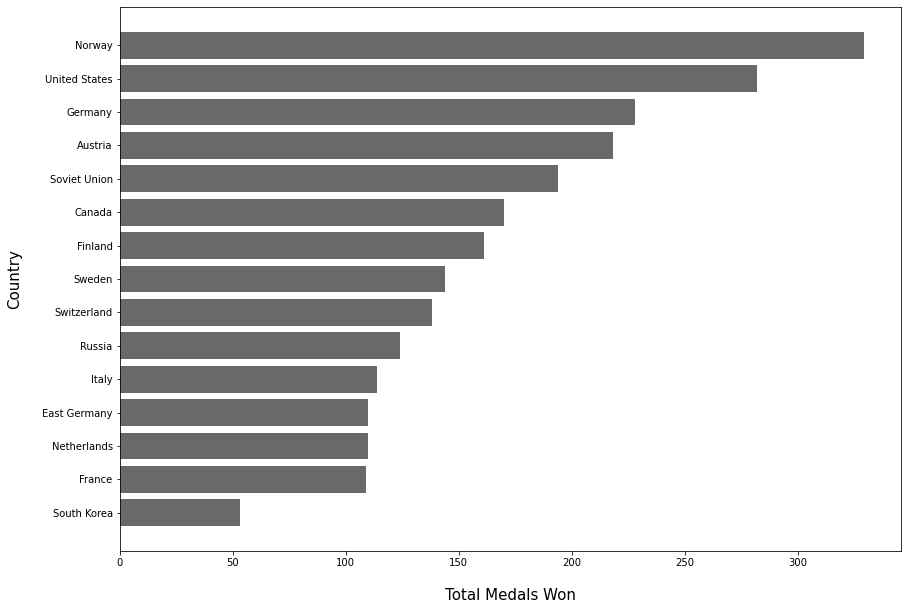

In [5]:
fig = plt.figure(figsize=(14, 10))
top_15 = med_rank.head(15).sort_values(by='Medal Count').reset_index()
plt.barh(top_15['Country'], top_15['Medal Count'], color='dimgray')
plt.xlabel('Total Medals Won', labelpad=20, size=15)
plt.ylabel('Country', labelpad=20, size=15);

###### Countries Ranked by Total Number of Gold, Silver, and Bronze Medals Won:

In [6]:
Gold = tot_med.loc[idx[:, 'gold', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")
Silver = tot_med.loc[idx[:, 'silver', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")
Bronze = tot_med.loc[idx[:, 'bronze', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")

display_html(Gold._repr_html_() + Silver._repr_html_() + Bronze._repr_html_(), raw=True)

,,Medal Count
Country,Medal,
Norway,gold,118
United States,gold,96
Germany,gold,86
Soviet Union,gold,78
Canada,gold,62
,,Medal Count
Country,Medal,
Norway,silver,111
United States,silver,102


    These preliminary findings show that Norway has won the most gold, silver, and bronze medals at the Winter Olympics, 
    also showing they have won the most total medals. In second place for gold, silver, and bronze medals won is the United 
    States, the United States also coming in second for total medals won. Germany comes in third place for gold, silver, and 
    total medals won, but Austria is third for bronze medals won.
    
    Now we wish to get a good sense of how many medals each of the top three total medal-winning countries have won over the 
    years and not just their total count. We then will analyze whether or not the total number of medals each country has 
    won has increased, decreased, or stayed the same as more medal-winning opportunities have been added to the Winter 
    Olympics since 1924.
    

### Top Three Medal-Winning Countries - Graphical Analysis

##### Plotting Medals Won Over Time - Norway

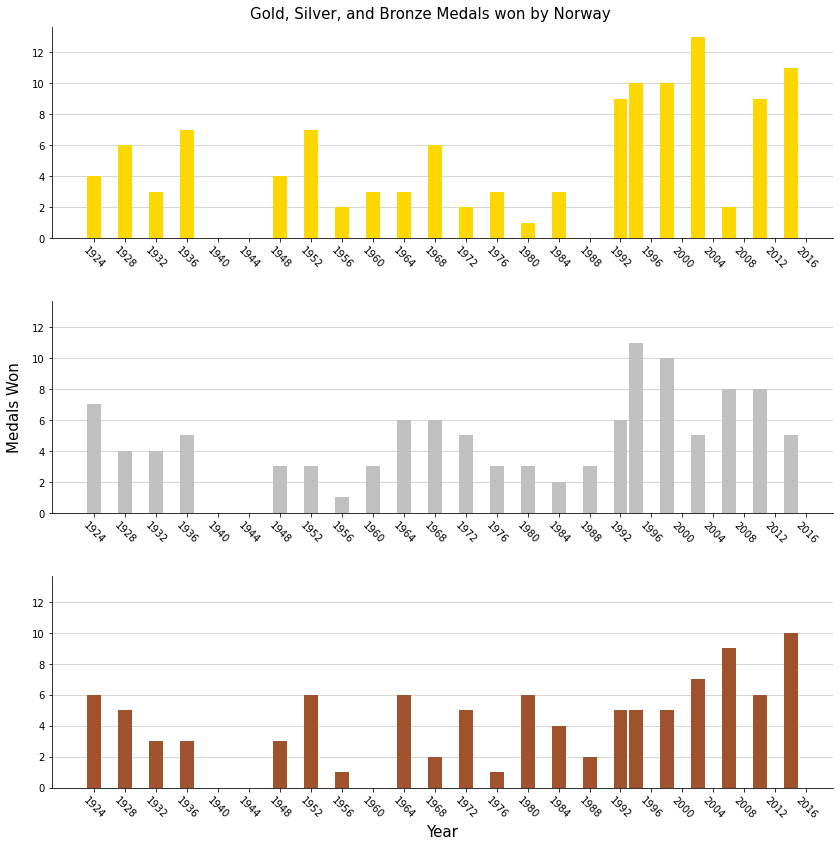

In [7]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals won by Norway', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Norway_one_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1948:1984]
Norway_three_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1988:1994]
Norway_four_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1994:2014]

x1 = range(1924, 1940, 4)
x2 = range(1948, 1985, 4)
x3 = range(1992, 1995, 2)
x4 = range(1994, 2015, 4)

axs[0].bar(x1, Norway_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, Norway_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, Norway_three_gold, color = 'gold', width = 1.8)
axs[0].bar(x4, Norway_four_gold, color = 'gold', width = 1.8)
plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Norway_one_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1948:1992]
Norway_three_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1994:2014]

x5 = range(1948, 1995, 4)

axs[1].bar(x1, Norway_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x5, Norway_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x4, Norway_three_silver, color = 'silver', width = 1.8)
plt.sca(axs[1])
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Norway_one_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1948:1956]
Norway_three_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1964:1992]
Norway_four_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1994:2014]

x6 = range(1948, 1957, 4)
x7 = range(1964, 1995, 4)
x8 = range(1994, 2015, 4)

axs[2].bar(x1, Norway_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x6, Norway_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x7, Norway_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x8, Norway_four_bronze, color = 'sienna', width = 1.8)
plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

    One of the first things we noticed from creating this plot was that the years did not line up properly. The first Winter 
    Olympics was held in 1924. If held every four years, there should have been games in 2016 and 2020. This, however, is 
    not the case. What we learned is that in the 1990s the games were changed to happen in-between when the Summer Olympics, so the Winter Olympics were held in 1992 and the again two years later in 1994. Visually, this can be seen by looking at the numbers of medals won 1994 and beyond. Instead of occuring on a tick, they appear between ticks.
    
    We noticed two things of interest here. First, as stated before, there is a break in medals won from the 1944 and 1948  Winter Olympics becaues of WWII. The second thing of interest is that Norway did not win any gold medals in any category in the 1988 Winter Olympics. They also did not win any bronze medals in 1960.
   

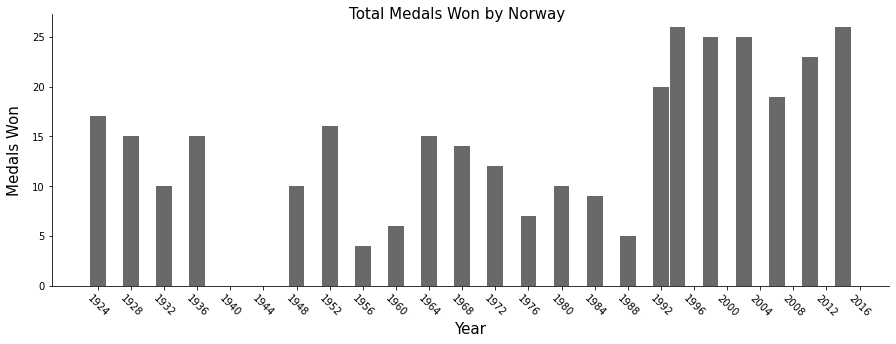

In [8]:
sport = winter_raw.loc[:, ['Year', 'Medal']].set_index(['Year']).sort_values(by = 'Year')
sport['Medal'] = sport['Medal'].apply(lambda x: 1)
sport = sport.groupby(['Year']).aggregate('sum')

norway_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Norway']['Medal Count'])

x1 = range(1924, 1940, 4)
x2 = range(1948, 1994, 4)
x3 = range(1992, 1996, 2)
x4 = range(1994, 2015, 4)

Norway_tot_one = norway_tot.loc[:]['Medal Count'].loc[1924:1940]
Norway_tot_two = norway_tot.loc[:]['Medal Count'].loc[1948:1992]
Norway_tot_three = norway_tot.loc[:]['Medal Count'].loc[1992:1995]
Norway_tot_four = norway_tot.loc[:]['Medal Count'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Total Medals Won by Norway', y=.9, size=15)
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.bar(x1, Norway_tot_one, color = 'dimgray', width = 1.9)
plt.bar(x2, Norway_tot_two, color = 'dimgray', width = 1.9)
plt.bar(x3, Norway_tot_three, color = 'dimgray', width = 1.9)
plt.bar(x4, Norway_tot_four, color = 'dimgray', width = 1.9)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax.set_xlabel('Year', fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##### Plotting Percent Medals Won Over Time - Norway

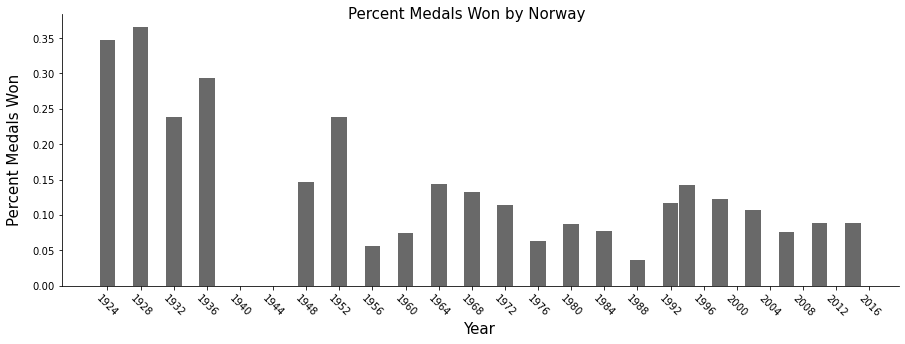

In [9]:
norway_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Norway']['Medal Count'])
norway_tot['AVG'] = (norway_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

x1 = range(1924, 1940, 4)
x2 = range(1948, 1994, 4)
x3 = range(1992, 1996, 2)
x4 = range(1994, 2015, 4)

Norway_one = norway_tot.loc[:]['AVG'].loc[1924:1940]; Norway_two = norway_tot.loc[:]['AVG'].loc[1948:1992]
Norway_three = norway_tot.loc[:]['AVG'].loc[1992:1995]; Norway_four = norway_tot.loc[:]['AVG'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Percent Medals Won by Norway', y=.9, size=15)
plt.ylabel('Percent Medals Won', fontsize=15, labelpad=10)
fig.set_figheight(5); fig.set_figwidth(15)
plt.bar(x1, Norway_one, color = 'dimgray', width = 1.9)
plt.bar(x2, Norway_two, color = 'dimgray', width = 1.9)
plt.bar(x3, Norway_three, color = 'dimgray', width = 1.9)
plt.bar(x4, Norway_four, color = 'dimgray', width = 1.9)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax.set_xlabel('Year', fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

    This result greatly suprised us. Our hypothesis was that the reason Norway saw an increase in medals won was because of the addition of new events each year. This graph suggests otherwise. It shows that Norway won a higer percentage of 
    medals, near 35% of available medals, when the first Winter Olympics were held, and only won around 10% of available 
    medals in the 2014 games. This shows that the number of medals Norway has won has remained relatively the same as the number of medals has increased. Looking back, the number of medals that Norway has won does seem to be flatter than previously stated.

##### Plotting Medals Won Over Time - United States

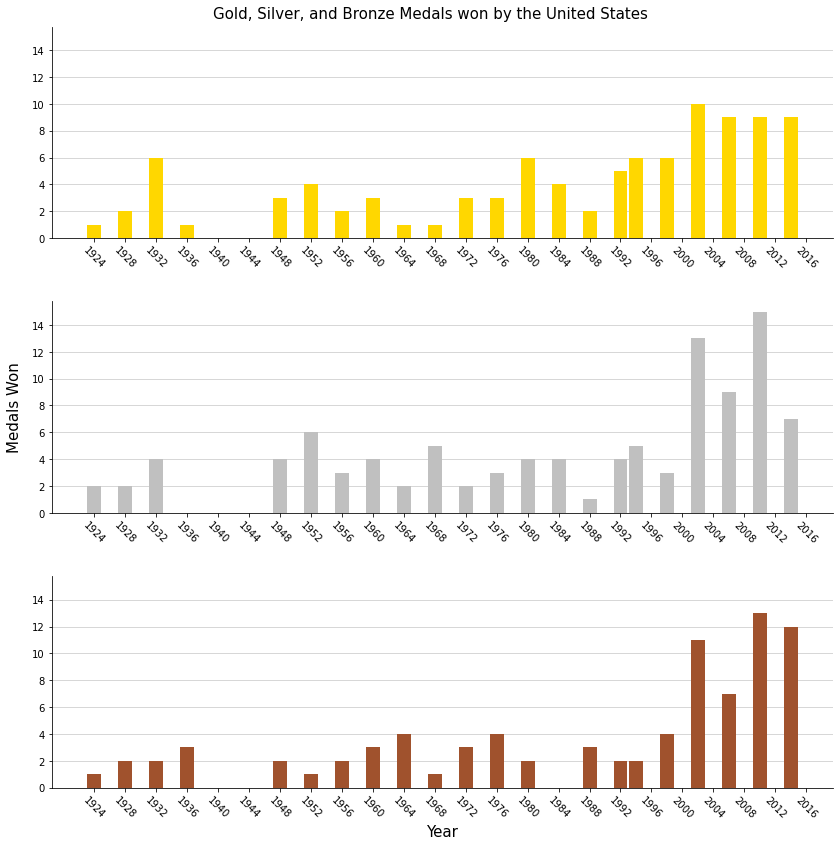

In [10]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals won by the United States', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

USA_one_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1924:1940]
USA_two_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1948:1992]
USA_three_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1994:2014]

x1 = range(1924, 1940, 4)
x2 = range(1948, 1995, 4)
x3 = range(1994, 2015, 4)

axs[0].bar(x1, USA_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, USA_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, USA_three_gold, color = 'gold', width = 1.8)

plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

USA_one_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1924:1933]
USA_two_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1948:1992]
USA_three_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1994:2014]

x4 = range(1924, 1933, 4)
x5 = range(1948, 1995, 4)
x6 = range(1994, 2015, 4)

axs[1].bar(x4, USA_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x5, USA_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x6, USA_three_silver, color = 'silver', width = 1.8)

plt.sca(axs[1]); plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

USA_one_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1924:1940]
USA_two_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1948:1980]
USA_three_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1988:1992]
USA_four_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1994:2014]

x7 = range(1948, 1981, 4)
x8 = range(1988, 1993, 4)
x9 = range(1994, 2015, 4)

axs[2].bar(x1, USA_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x7, USA_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x8, USA_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x9, USA_four_bronze, color = 'sienna', width = 1.8)

plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

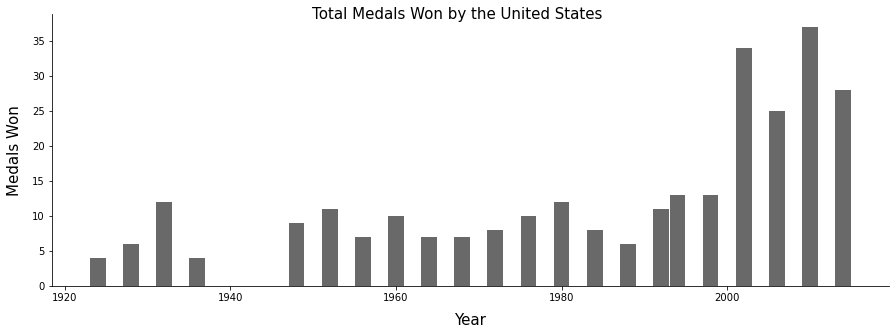

In [11]:
unitedStates_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['United States']['Medal Count'])

x1 = range(1924, 1940, 4)
x2 = range(1948, 1994, 4)
x3 = range(1992, 1996, 2)
x4 = range(1994, 2015, 4)

USA_tot_one = unitedStates_tot.loc[:]['Medal Count'].loc[1924:1940]
USA_tot_two = unitedStates_tot.loc[:]['Medal Count'].loc[1948:1992]
USA_tot_three = unitedStates_tot.loc[:]['Medal Count'].loc[1992:1995]
USA_tot_four = unitedStates_tot.loc[:]['Medal Count'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Total Medals Won by the United States', y=.9, size=15)
plt.ylabel('Medals Won', size=15, labelpad=10)
plt.xlabel('Year', size=15, labelpad=10)
fig.set_figheight(5); fig.set_figwidth(15)
plt.bar(x1, USA_tot_one, color = 'dimgray', width = 1.9)
plt.bar(x2, USA_tot_two, color = 'dimgray', width = 1.9)
plt.bar(x3, USA_tot_three, color = 'dimgray', width = 1.9)
plt.bar(x4, USA_tot_four, color = 'dimgray', width = 1.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##### Plotting Percent Medals Won Over Time - United States

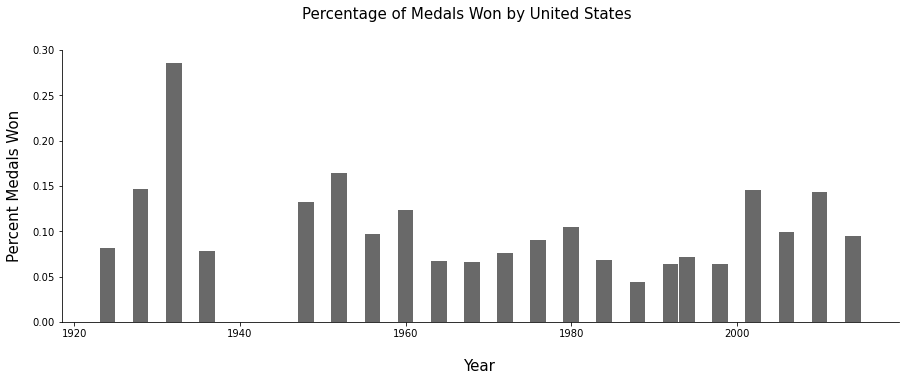

In [12]:
unitedStates_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['United States']['Medal Count'])
unitedStates_tot['AVG'] = (unitedStates_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

x1 = range(1924, 1940, 4)
x2 = range(1948, 1994, 4)
x3 = range(1992, 1996, 2)
x4 = range(1994, 2015, 4)

USA_one = unitedStates_tot.loc[:]['AVG'].loc[1924:1940]
USA_two = unitedStates_tot.loc[:]['AVG'].loc[1948:1992]
USA_three = unitedStates_tot.loc[:]['AVG'].loc[1992:1995]
USA_four = unitedStates_tot.loc[:]['AVG'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Percentage of Medals Won by United States', y=1, size=15)
plt.ylabel('Percent Medals Won', size=15, labelpad=10)
plt.xlabel('Year', size=15, labelpad=20)
fig.set_figheight(5); fig.set_figwidth(15)
plt.bar(x1, USA_one, color = 'dimgray', width = 1.9)
plt.bar(x2, USA_two, color = 'dimgray', width = 1.9)
plt.bar(x3, USA_three, color = 'dimgray', width = 1.9)
plt.bar(x4, USA_four, color = 'dimgray', width = 1.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##### Plotting Medals Won Over Time - Germany

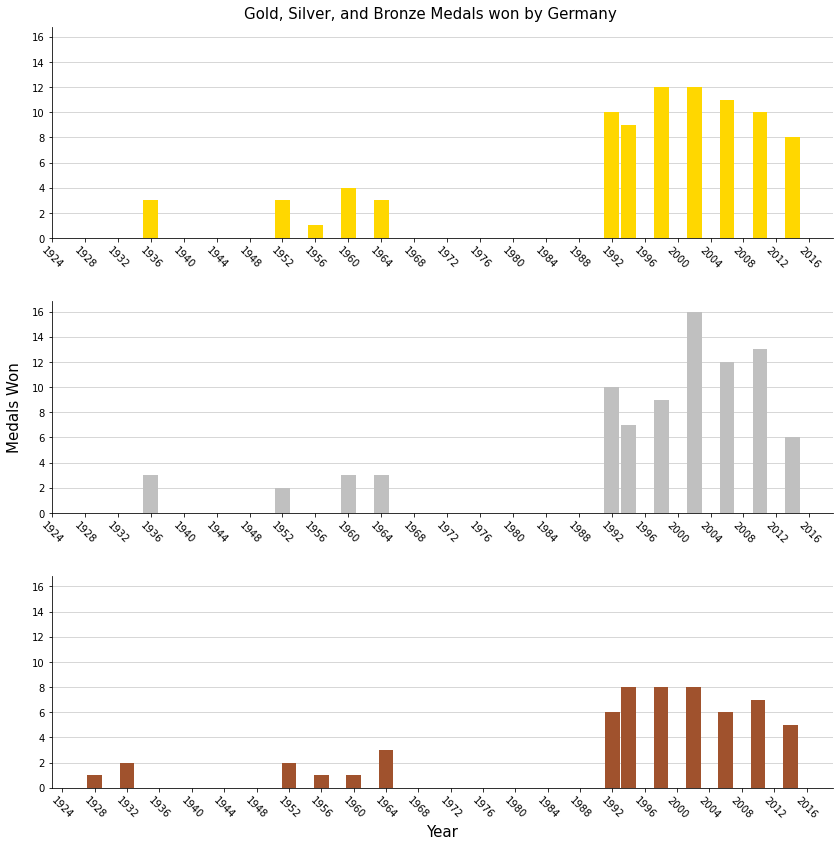

In [13]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals won by Germany', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Germany_one_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1936:1940]
Germany_two_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1952:1968]
Germany_three_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1992]
Germany_four_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1994:2014]

x1 = range(1936, 1940, 4)
x2 = range(1952, 1968, 4)
x3 = 1992
x4 = range(1994, 2015, 4)

axs[0].bar(x1, Germany_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, Germany_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, Germany_three_gold, color = 'gold', width = 1.8)
axs[0].bar(x4, Germany_four_gold, color = 'gold', width = 1.8)

plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Germany_one_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1936]
Germany_two_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1952]
Germany_three_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1960:1964]
Germany_four_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1992]
Germany_five_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1994:2014]

x5 = 1936
x6 = 1952
x7 = range(1960, 1965, 4)
x8 = 1992
x9 = range(1994, 2015, 4)

axs[1].bar(x5, Germany_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x6, Germany_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x7, Germany_three_silver, color = 'silver', width = 1.8)
axs[1].bar(x8, Germany_four_silver, color = 'silver', width = 1.8)
axs[1].bar(x9, Germany_five_silver, color = 'silver', width = 1.8)

plt.sca(axs[1])
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Germany_one_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1928:1932]
Germany_two_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1952:1964]
Germany_three_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1992]
Germany_four_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1994:2014]

x10 = range(1928, 1933, 4)
x11 = range(1952, 1965, 4)
x3 = 1992
x4 = range(1994, 2015, 4)

axs[2].bar(x10, Germany_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x11, Germany_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x3, Germany_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x4, Germany_four_bronze, color = 'sienna', width = 1.8)

plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

    Something about how we noticed there was a huge gap in germany's medal wins (it's because it was split into east and 
    west germany!) and how we should now account for that

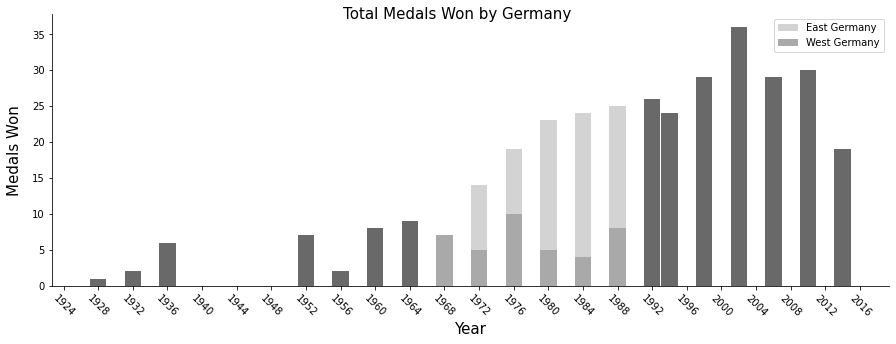

In [14]:
germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Germany']['Medal Count'])
e_germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['East Germany']['Medal Count'])
w_germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['West Germany']['Medal Count'])

x1 = range(1928, 1940, 4)
x2 = range(1952, 1965, 4)
x3 = 1992
x4 = range(1992, 1996, 2)
x5 = range(1994, 2015, 4)

Germany_tot_one = germany_tot.loc[:]['Medal Count'].loc[1928:1940]
Germany_tot_two = germany_tot.loc[:]['Medal Count'].loc[1952:1965]
Germany_tot_three = germany_tot.loc[:]['Medal Count'].loc[1992]
Germany_tot_four = germany_tot.loc[:]['Medal Count'].loc[1992:1995]
Germany_tot_five = germany_tot.loc[:]['Medal Count'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Total Medals Won by Germany', y=.9, size=15)
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
fig.set_figheight(5); fig.set_figwidth(15)

plt.bar(x1, Germany_tot_one, color = 'dimgray', width = 1.9)
plt.bar(x2, Germany_tot_two, color = 'dimgray', width = 1.9)
plt.bar(x3, Germany_tot_three, color = 'dimgray', width = 1.9)
plt.bar(x4, Germany_tot_four, color = 'dimgray', width = 1.9)
plt.bar(x5, Germany_tot_five, color = 'dimgray', width = 1.9)

e = e_germany_tot.loc[:]['Medal Count'].loc[1968:1988]
w = w_germany_tot.loc[:]['Medal Count'].loc[1968:1988]
x = range(1968, 1989, 4)

plt.bar(x, e, width = 1.9, label = 'East Germany', color = 'lightgray')
plt.bar(x, w, width = 1.9, label = 'West Germany', color = 'darkgray')
plt.xticks(range(1924, 2020, 4), rotation = -45)
plt.legend()

ax.set_xlabel('Year', fontsize = 15)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

##### Plotting Percent Medals Won Over Time - Germany

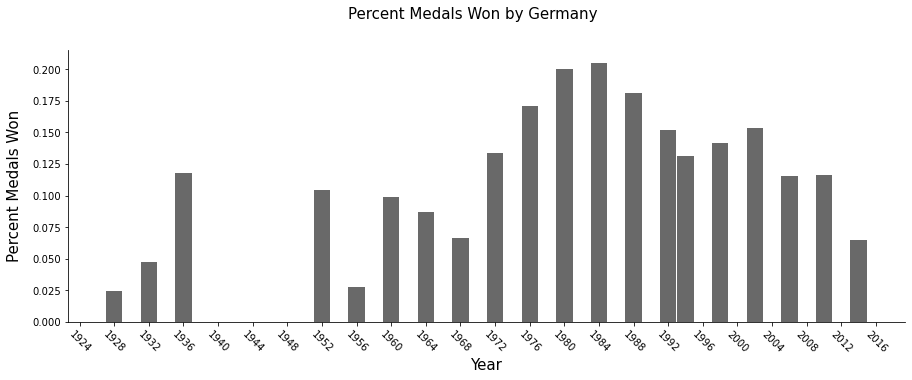

In [15]:
germany_tot['AVG'] = (germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])
e_germany_tot['AVG'] = (e_germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])
w_germany_tot['AVG'] = (w_germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

Germany_tot_one = germany_tot.loc[:]['AVG'].loc[1928:1940]
Germany_tot_two = germany_tot.loc[:]['AVG'].loc[1952:1965]
Germany_tot_three = germany_tot.loc[:]['AVG'].loc[1992]
Germany_tot_four = germany_tot.loc[:]['AVG'].loc[1992:1995]
Germany_tot_five = germany_tot.loc[:]['AVG'].loc[1994:2015]

fig, ax = plt.subplots()
plt.suptitle('Percent Medals Won by Germany', y=1, size=15)
plt.ylabel('Percent Medals Won', fontsize=15,labelpad=10)
fig.set_figheight(5); fig.set_figwidth(15)

plt.bar(x1, Germany_tot_one, color = 'dimgray', width = 1.9)
plt.bar(x2, Germany_tot_two, color = 'dimgray', width = 1.9)
plt.bar(x3, Germany_tot_three, color = 'dimgray', width = 1.9)
plt.bar(x4, Germany_tot_four, color = 'dimgray', width = 1.9)
plt.bar(x5, Germany_tot_five, color = 'dimgray', width = 1.9)

e = e_germany_tot.loc[:]['AVG'].loc[1968:1988]
w = w_germany_tot.loc[:]['AVG'].loc[1968:1988]

plt.bar(x, e, width = 1.9, label = 'East Germany', color = 'dimgray')
plt.bar(x, w, width = 1.9, label = 'West Germany', color = 'dimgray')
plt.xticks(range(1924, 2020, 4), rotation = -45)

ax.set_xlabel('Year', fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Top Three Medal-Winning Countries - Per Capita GDP Analysis

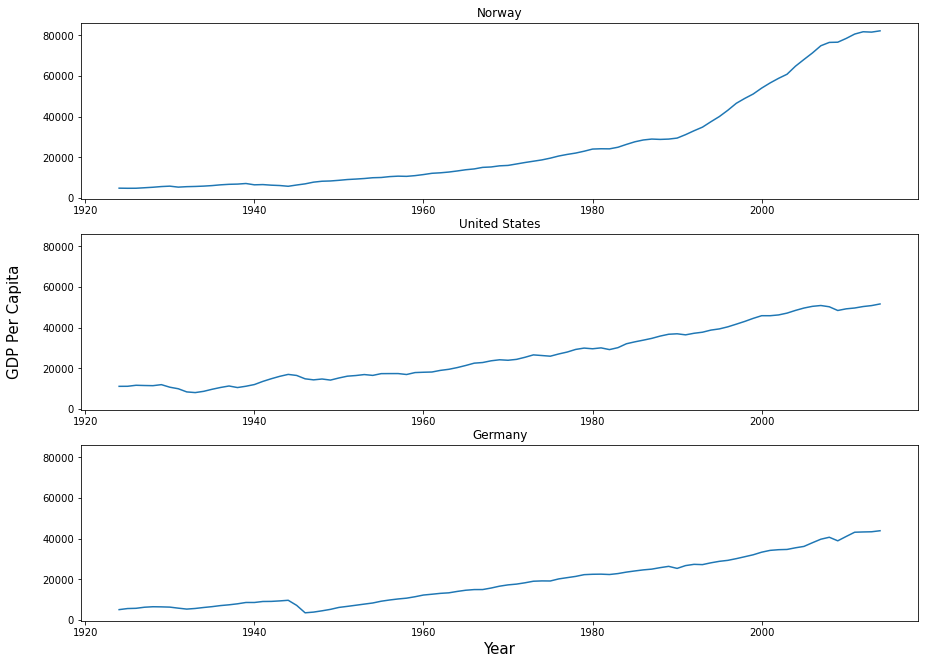

In [16]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(11); fig.set_figwidth(15)

countries = pd.DataFrame(med_rank.reset_index()['Country']).set_index('Country').sort_values(by='Country')
GDP.set_index('Country')
both = pd.merge(GDP, countries, on='Country').sort_values(by = ['Country', 'Year'], ascending=True)
both = both.loc[(both['Year'] >= 1924) & (both['Year'] <= 2014)].set_index(['Country'])

both_norway = both.loc['Norway']['GDP per capita']
both_america = both.loc['United States']['GDP per capita']
both_germany = both.loc['Germany']['GDP per capita']

x = range(1924, 2015)
axs[0].plot(x, both_norway)
axs[0].title.set_text('Norway')

axs[1].plot(x, both_america)
axs[1].title.set_text('United States')
axs[1].set_ylabel('GDP Per Capita', labelpad = 20, size = 15)

axs[2].plot(x, both_germany)
axs[2].set_xlabel('Year', size = 15)
axs[2].title.set_text('Germany')

##### Summed Per Capita GDP by Country:

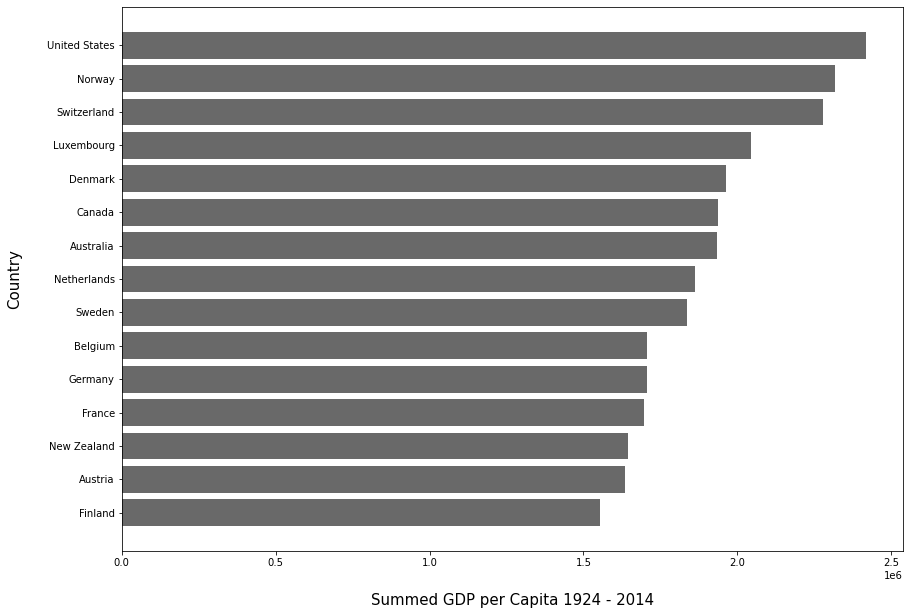

In [17]:
fig = plt.figure(figsize=(14, 10))
gdp_sum = both.groupby(['Country']).aggregate('sum').loc[:, ['GDP per capita']].reset_index()
gdp_sum = gdp_sum.sort_values(by='GDP per capita', ascending=False).head(15)
gdp_sum = gdp_sum.sort_values(by='GDP per capita', ascending=True)
plt.ylabel('Country', labelpad=25, size=15)
plt.xlabel('Summed GDP per Capita 1924 - 2014', labelpad = 25, size=15)
plt.barh(gdp_sum['Country'], gdp_sum['GDP per capita'], color = 'dimgray');

In [18]:
#ADD SOMETHING ABOUT HOW THE DATASET ACCOUNTS FOR WEST AND EAST GERMANY

### Top Three Medal-Winning Countries and the Event in which they Won the Most Medals

In [19]:
Medal_by_Sport = winter.groupby(['Country', 'Sport', 'Medal']).aggregate('sum').sort_values(by='Medal Count', ascending=False)

Norway_Med = Medal_by_Sport.loc[idx['Norway', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
US_Med = Medal_by_Sport.loc[idx['United States', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
Germany_Med = Medal_by_Sport.loc[idx['Germany', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Norway_Med._repr_html_() + US_Med._repr_html_() + Germany_Med._repr_html_(), raw=True)

Medal_by_Sport_tot = winter.groupby(['Country', 'Sport']).aggregate('sum').sort_values(by='Medal Count', ascending=False)

Norway_Med_tot = Medal_by_Sport_tot.loc[idx['Norway', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
US_Med_tot = Medal_by_Sport_tot.loc[idx['United States', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
Germany_Med_tot = Medal_by_Sport_tot.loc[idx['Germany', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Norway_Med_tot._repr_html_() + US_Med_tot._repr_html_() + Germany_Med_tot._repr_html_(), raw=True)

Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 Norway 
 Cross-Country Skiing 
 gold 
 40 
 
 
 silver 
 38 
 
 
 bronze 
 29 
 
 
 Speedskating 
 silver 
 28 
 
 
 bronze 
 27 
 
 
 

 
 
 
   
   
   
 Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 United States 
 Speedskating 
 gold 
 29 
 
 
 silver 
 22 
 
 
 Alpine Skiing 
 silver 
 19 
 
 
 Figure Skating 
 bronze 
 17 
 
 
 silver 
 16 
 
 
 

 
 
 
   
   
   
 Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 Germany 
 Biathlon 
 silver 
 20 
 
 
 Luge 
 gold 
 17 
 
 
 Speedskating 
 silver 
 16 
 
 
 Biathlon 
 gold 
 16 
 
 
 Alpine Skiing 
 gold 
 14

Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 Norway 
 Cross-Country Skiing 
 107 
 
 
 Speedskating 
 80 
 
 
 Biathlon 
 35 
 
 
 Ski Jumping 
 30 
 
 
 Nordic Combined 
 30 
 
 
 

 
 
 
   
   
 Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 United States 
 Speedskating 
 67 
 
 
 Figure Skating 
 48 
 
 
 Alpine Skiing 
 44 
 
 
 Snowboarding 
 24 
 
 
 Bobsled 
 24 
 
 
 

 
 
 
   
   
 Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 Germany 
 Biathlon 
 45 
 
 
 Speedskating 
 40 
 
 
 Luge 
 36 
 
 
 Alpine Skiing 
 31 
 
 
 Bobsled 
 21

    The analysis shows that the biggest medal-winning event for Norway is Cross-Country Skiing. It's also the second and 
    third largest medal-winning sport for Norway. For the United States, the sport that has won them the most medals has 
    been Speedskating. For Germany, the title belongs to Biathlon. This trend continues for total medals won, Cross-Country 
    Skiing winning Norway the most total medals, Speedskating winning the United States the most total medals, and Biathlon 
    winning Germany the most total medals.
    
    We found it interesting that for both Norway and the United States within the event that produced the most medals the 
    most number of medals won was in the gold category. We expected to see a country win more bronze or even silver medals 
    for their top medal-producing steps as was seen with Germany.

### Winter Olympic Events - Gold & Total Medals Won by Country:

In [20]:
winter_most_gold = winter_raw
winter_most_gold['Medal Rank'] = winter_most_gold['Medal Rank'].apply(lambda x:1)
winter_most_gold = (winter_most_gold.groupby(['Country', 'Sport', 'Medal']).sum()).drop(columns='Year')

winter_most_tot = winter_raw.groupby(['Country', 'Sport']).sum()
winter_most_tot = winter_most_tot.drop(columns='Year')

##### Ice Hockey Gold & Total Medals Won by Country:

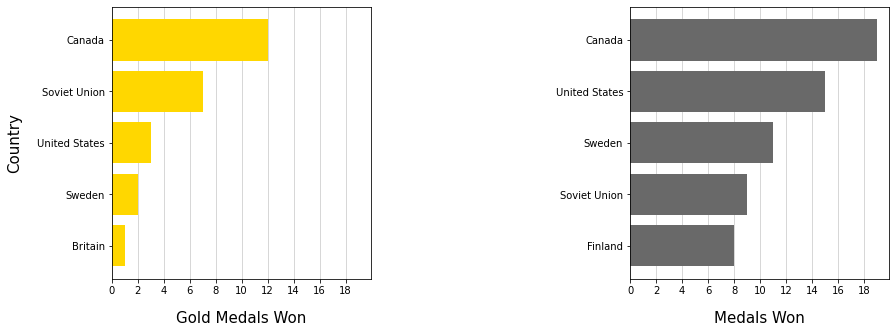

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,20,2))
hockey = winter_most_gold.loc[idx[:,'Ice Hockey', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
hockey_tot = winter_most_tot.loc[idx[:,'Ice Hockey', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

hockey = hockey.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(hockey['Country'], hockey['Medal Rank'], color = 'gold')

hockey_tot = hockey_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(hockey_tot['Country'], hockey_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    After finding which countries won the most gold and total medals in Ice Hockey, we can determine that Canada wins both 
    the most gold and total medals. This also supports our initial hypothesis that countries that are well known for certain winter sports, dominate that sport at the Winter Olympics since Canada is well known for Ice Hockey


##### Figure Sakting Gold & Total Medals Won by Country:

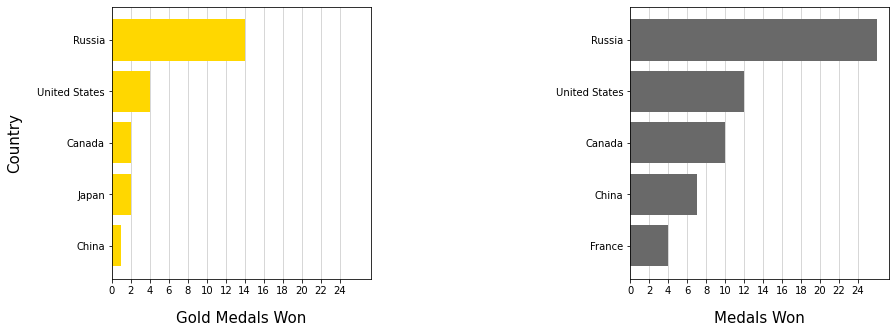

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,25,2))

winter_russia = winter_raw.loc[(winter_raw['Year'] >= 1994) & (winter_raw['Year'] <= 2014)]
winter_russia = (winter_russia.groupby(['Country', 'Sport', 'Medal']).sum()).drop(columns='Year')

winter_russia_tot = winter_russia.groupby(['Country', 'Sport']).sum()

skating = winter_russia.loc[idx[:,'Figure Skating', 'gold', :]].sort_values(by='Medal Rank', ascending = False).head(5)

skating_tot = winter_russia_tot.loc[idx[:,'Figure Skating', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

skating = skating.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(skating['Country'], skating['Medal Rank'], color = 'gold')

skating_tot = skating_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(skating_tot['Country'], skating_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    In our hypothesis, we wanted to see if Russia won the most gold and total number of medals at the Winter Olympics for 
    Figure Skating since they are well known in this event. However, when we were writing our hypothesis, the 
    Russia we were referring to was the Russian Federation that Russia was reorganized after the fall of the Soviet Union. 
    With that said, we only used data from after 1994, which was when the Russian Federation first participated in the 
    Winter Olympics. Another reason for using data after 1994 was because after the Soviet Union dissolved and the countries that were apart of it became independent from Russia. Several of those countries now participate in the Figure Skating 
    at the Winter Olympics and have won medals; such as Ukraine and Kazakhstan. As such the medal won by the Soviet Union in Figure Skating can't count as medals won by Russia as an athlete who won a Figure Skating medal for the The Soviet Union might have been from modern day Ukraine.
    
    The data collected also shows that our hypothesis that since Russia is well known for Figure Skating, they won the most gold and total medals at the Winter Olympics. So we can conclude that based on the data collected from the most gold and total medals for Ice Hockey and Figure Skating that countries that are well known for certain winter sports win the most gold and total medals for that sport at the Winter Olympics


##### Cross-Country Skiing Gold & Total Medals Won by Country:

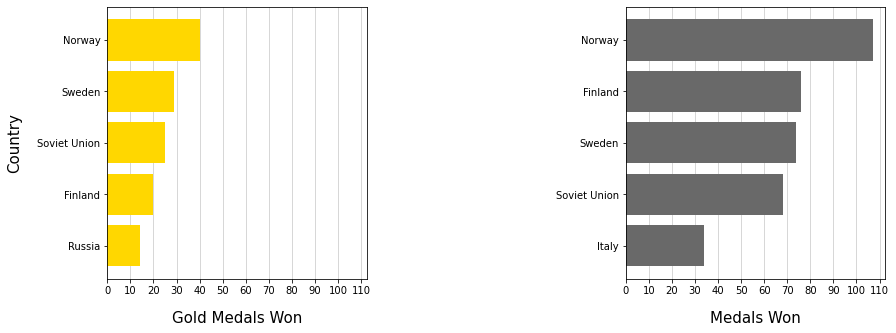

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
crosscountry = winter_most_gold.loc[idx[:,'Cross-Country Skiing', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
crosscountry_tot = winter_most_tot.loc[idx[:,'Cross-Country Skiing', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

crosscountry = crosscountry.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(crosscountry['Country'], crosscountry['Medal Rank'], color = 'gold')

crosscountry_tot = crosscountry_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(crosscountry_tot['Country'], crosscountry_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    These results also support part of our next hypothesis. The sport that won Norway the most medals, by type, and total 
    medals was Cross-Country Skiing. As it turns out, they are the country that has won the most gold and total medals in 
    this event over the years. Because of the sheer number of medals Norway has won compared to other countries, we do not 
    find these results to be suprising.

##### Speedskaing Gold & Total Medals Won by Country:

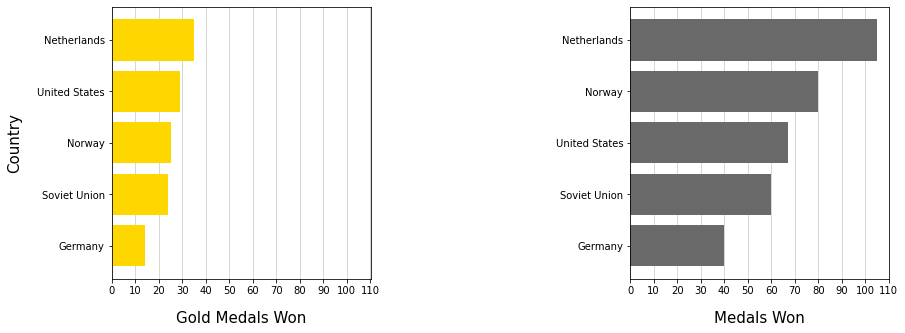

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
speedskating = winter_most_gold.loc[idx[:,'Speedskating', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
speedskating_tot = winter_most_tot.loc[idx[:,'Speedskating', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

speedskating = speedskating.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(speedskating['Country'], speedskating['Medal Rank'], color = 'gold')

speedskating_tot = speedskating_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(speedskating_tot['Country'], speedskating_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    These results greatly suprised us. The sport that has won the most gold and total medals is Speedskaing. Despite this 
    fact, they are not leading in gold and total medals won in this sport. This title goes to the Netherlands for both gold and total medals won in this event. The number of gold medals they have won in this event is similar to the number the 
    United States has won, but they have won far more total medals in this event.

In [25]:
Medal_by_Sport = winter.groupby(['Country', 'Sport', 'Medal']).aggregate('sum').sort_values(by='Medal Count', ascending=False)
Netherlands_Med = Medal_by_Sport.loc[idx['Netherlands', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

Medal_by_Sport_tot = winter.groupby(['Country', 'Sport']).aggregate('sum').sort_values(by='Medal Count', ascending=False)
Netherlands_Med_tot = Medal_by_Sport_tot.loc[idx['Netherlands', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Netherlands_Med._repr_html_() + Netherlands_Med_tot._repr_html_(), raw=True)

Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 Netherlands 
 Speedskating 
 silver 
 36 
 
 
 gold 
 35 
 
 
 bronze 
 34 
 
 
 Figure Skating 
 silver 
 2 
 
 
 gold 
 1 
 
 
 

 
 
 
   
   
 Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 Netherlands 
 Speedskating 
 105 
 
 
 Figure Skating 
 3 
 
 
 Snowboarding 
 1 
 
 
 Short-Track Speedskating 
 1

    Unsuprisingly, the event that has won the most medals, total and by type, for the Netherlands is Speedskating. What we 
    did find interesting is that the Netherlands has won 110 total medals from 1924 to 2014, and 105 of them are from 
    Speedskating. We were also suprised that they won more silver medals in this category than gold medals, though it's very
    close.

##### Biathlon Gold & Total Medals Won by Country:

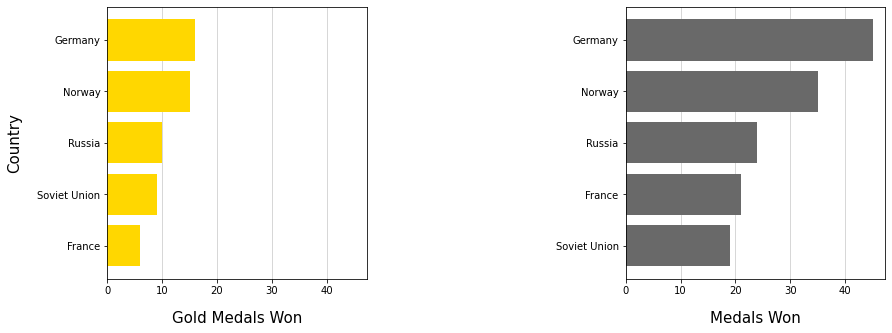

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
biathlon = winter_most_gold.loc[idx[:,'Biathlon', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
biathlon_tot = winter_most_tot.loc[idx[:,'Biathlon', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

biathlon = biathlon.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(biathlon['Country'], biathlon['Medal Rank'], color = 'gold')

biathlon_tot = biathlon_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(biathlon_tot['Country'], biathlon_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    Once again, these results are unsuprising. The Biathlon won Germany the most gold and total medals, so we find it 
    unsuprising that they hold the title for most gold and total medals in this category out of all the countries.

##### Curling Gold & Total Medals Won by Country:

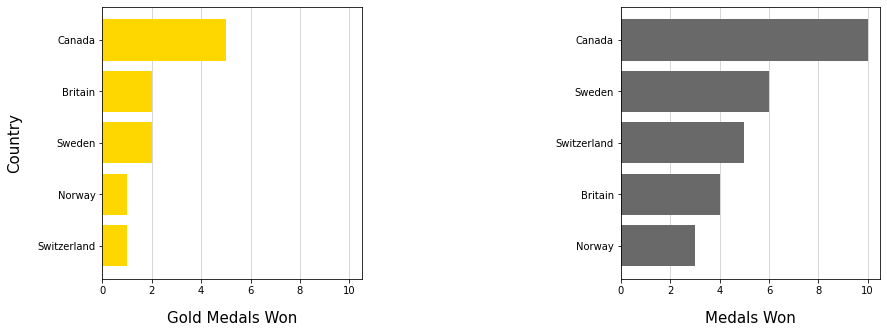

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,11,2))
curling = winter_most_gold.loc[idx[:,'Curling', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
curling_tot = winter_most_tot.loc[idx[:,'Curling', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

curling = curling.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(curling['Country'], curling['Medal Rank'], color = 'gold')

curling_tot = curling_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(curling_tot['Country'], curling_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    This analysis tells us that Canada hold the title for most gold and total medals won for Curling. We were suprised at 
    the small number of total medals that have been won in this category by Canada. Other events have over 100 total medals 
    won for their event in a single country, but this event only has 10 won for the highest medal-winning country.

##### Luge Gold & Total Medals Won by Country:

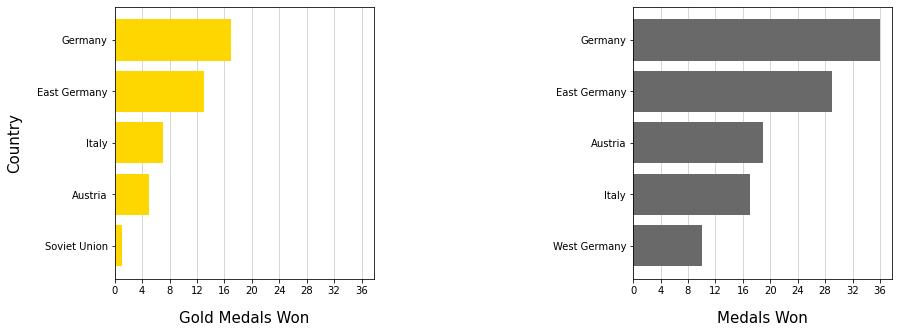

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,37,4))
luge = winter_most_gold.loc[idx[:,'Luge', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
luge_tot = winter_most_tot.loc[idx[:,'Luge', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

luge = luge.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(luge['Country'], luge['Medal Rank'], color = 'gold')

luge_tot = luge_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(luge_tot['Country'], luge_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    This analysis tells us that Germany holds the title for most gold and total medals won for Luge. Something that suprised us about these results is that both East and West Germany showed up in the top total medal winners for this event, East Germany having won almost as many total medals in this event in its short time in the Winter Olympics as Germany.

##### Alping Skiing Gold & Total Medals Won by Country:

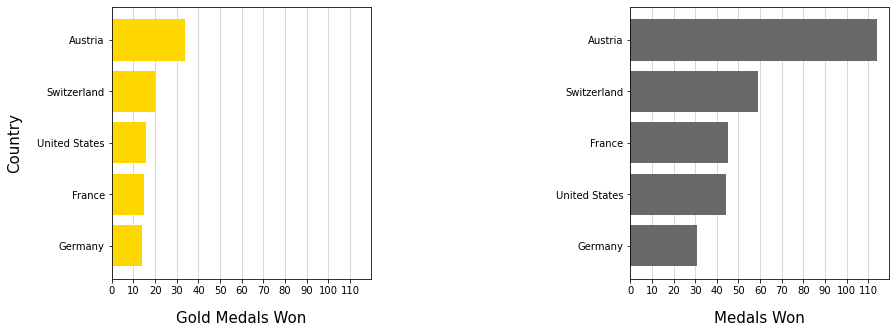

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
alpine_skii = winter_most_gold.loc[idx[:,'Alpine Skiing', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
alpine_skii_tot = winter_most_tot.loc[idx[:,'Alpine Skiing', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

alpine_skii = alpine_skii.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(alpine_skii['Country'], alpine_skii['Medal Rank'], color = 'gold')

alpine_skii_tot = alpine_skii_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(alpine_skii_tot['Country'], alpine_skii_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    This analysis clearly shows that Austria is winning when it comes to gold and total medals won for Alpine Skiing. 
    Something that suprised us from these plots is that Austria has nearly double the number of total medals won as the 
    country that comes in second in this event, Switzerland.

##### Snowboarding Gold & Total Medals Won by Country:

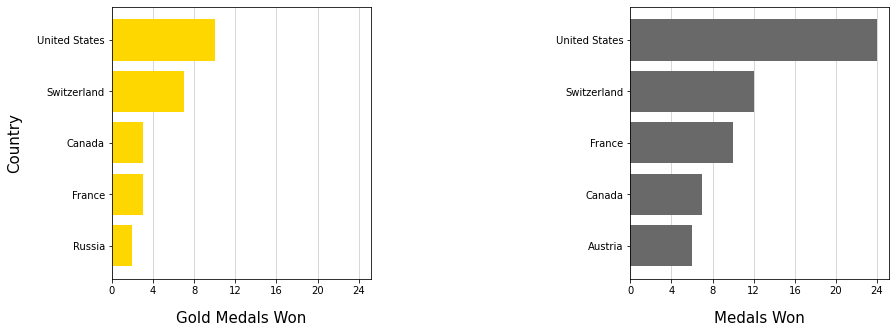

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,26,4))
snowboarding = winter_most_gold.loc[idx[:,'Snowboarding', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
snowboarding_tot = winter_most_tot.loc[idx[:,'Snowboarding', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

snowboarding = snowboarding.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(snowboarding['Country'], snowboarding['Medal Rank'], color = 'gold')

snowboarding_tot = snowboarding_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(snowboarding_tot['Country'], snowboarding_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

    This analysis shows that the United States is in the lead for both gold and total medals won for Snowboarding. What 
    suprised us about this is that they have won double the number of medals as the country in second place for total number of Snowboarding medals won, Switzerland. We were not suprised to learn that the United States leads in medals won for 
    Snowboarding, but we were suprised to learn that Switzerland was in second place for this event.

### Final Thoughts & Conclusion